In [1]:
from pathlib import Path
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# Read trace data

In [2]:
root_dir = Path(os.path.abspath('')).parents[1]
experiment_dir = os.path.join(root_dir, "axon_geometry")

brains = ["brain1", "brain2"]
measures = ["curvature", "torsion"]
max_id = 300

d = []

for brain in brains:
    data_dir = os.path.join(experiment_dir, "data", brain)
    segments_swc_dir = os.path.join(data_dir, "segments_swc")
    trace_data_dir = os.path.join(data_dir, "trace_data", "14")
    print(f"Directory where swcs reside: {segments_swc_dir}")
    
    for i in tqdm(np.arange(0, max_id)):
        i = int(i)
        trace_data_path = os.path.join(trace_data_dir, f"{i}.npy")
        if os.path.exists(trace_data_path) is True:
            trace_data = np.load(trace_data_path, allow_pickle=True)
            
            for node in trace_data:
                seg_length = node["seg_length"]
                log_seg_length = np.log10(seg_length)
                for measure in measures:
                    _measure = node[f"mean_{measure}"]
                    magnitude = "non-zero" if _measure > 1e-16 else "zero"
                    d.append({"brain": brain, "log_seg_length": log_seg_length, "measure": measure, "magnitude": magnitude})
df = pd.DataFrame(d)

Directory where swcs reside: /cis/home/jteneggi/repo/brainlit/experiments/axon_geometry/data/brain1/segments_swc
Loaded segment 2
Loaded segment 7
Loaded segment 11
Loaded segment 12
Loaded segment 13
Loaded segment 14
Loaded segment 20
Loaded segment 24
Loaded segment 28
Loaded segment 35
Loaded segment 40
Loaded segment 45
Loaded segment 48
Loaded segment 49
Loaded segment 51
Loaded segment 53
Loaded segment 59
Loaded segment 60
Loaded segment 65
Loaded segment 67
Loaded segment 73
Loaded segment 75
Loaded segment 77
Loaded segment 78
Loaded segment 79
Loaded segment 82
Loaded segment 83
Loaded segment 85
Loaded segment 86
Loaded segment 91
Loaded segment 98
Loaded segment 101
Loaded segment 103
Loaded segment 106
Loaded segment 120
Loaded segment 124
Loaded segment 136
Loaded segment 140
Loaded segment 141
Loaded segment 142
Loaded segment 143
Loaded segment 144
Loaded segment 145
Loaded segment 146
Loaded segment 147
Loaded segment 149
Loaded segment 150
Loaded segment 152
Loaded s

# Plot zero/non-zero magnitude densities as a function of `log` segment length

brain1, curvature, alpha = 0.25873288562652924
brain1, torsion, alpha = 0.40579936488104534
brain2, curvature, alpha = 0.2077591419751122
brain2, torsion, alpha = 0.34760192228127684


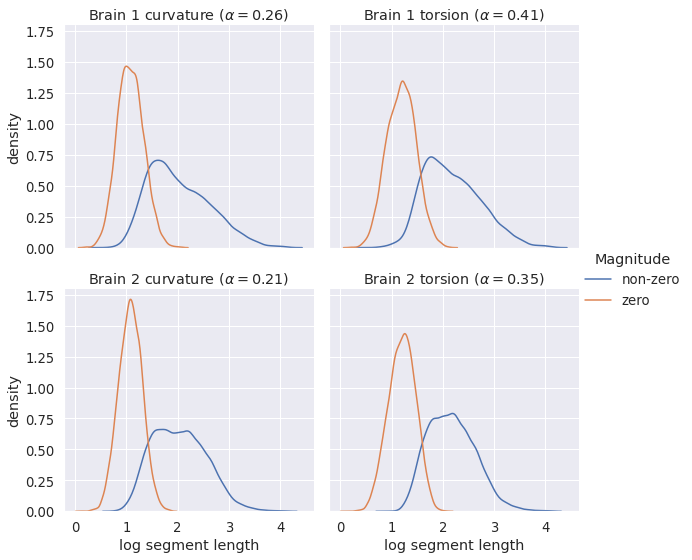

In [3]:
sns.set_theme()
sns.set_context("paper")
sns.set(font_scale=1.2)

g = sns.FacetGrid(df, col="measure", row="brain", hue="magnitude", height=4)
g.map(sns.kdeplot, "log_seg_length")
g.set_axis_labels("log segment length", "density")
g.add_legend(title="Magnitude")

axes = g.axes

for i, brain in enumerate(brains):
    brain_df = df[df["brain"] == brain]
    for j, measure in enumerate(measures):        
        measure_df = brain_df[brain_df["measure"] == measure]
        zero_measure = measure_df[measure_df["magnitude"] == "zero"]
        alpha_measure = len(zero_measure)/len(measure_df)
        print(f"{brain}, {measure}, alpha = {alpha_measure}")
        
        ax = axes[i, j]
        ax.set_title(r"Brain %d %s ($\alpha = %.2f$)" % (i+1, measure, alpha_measure))

g.savefig(os.path.join(experiment_dir, "figures", "histograms.eps"))
g.savefig(os.path.join(experiment_dir, "figures", "histograms.jpg"))